
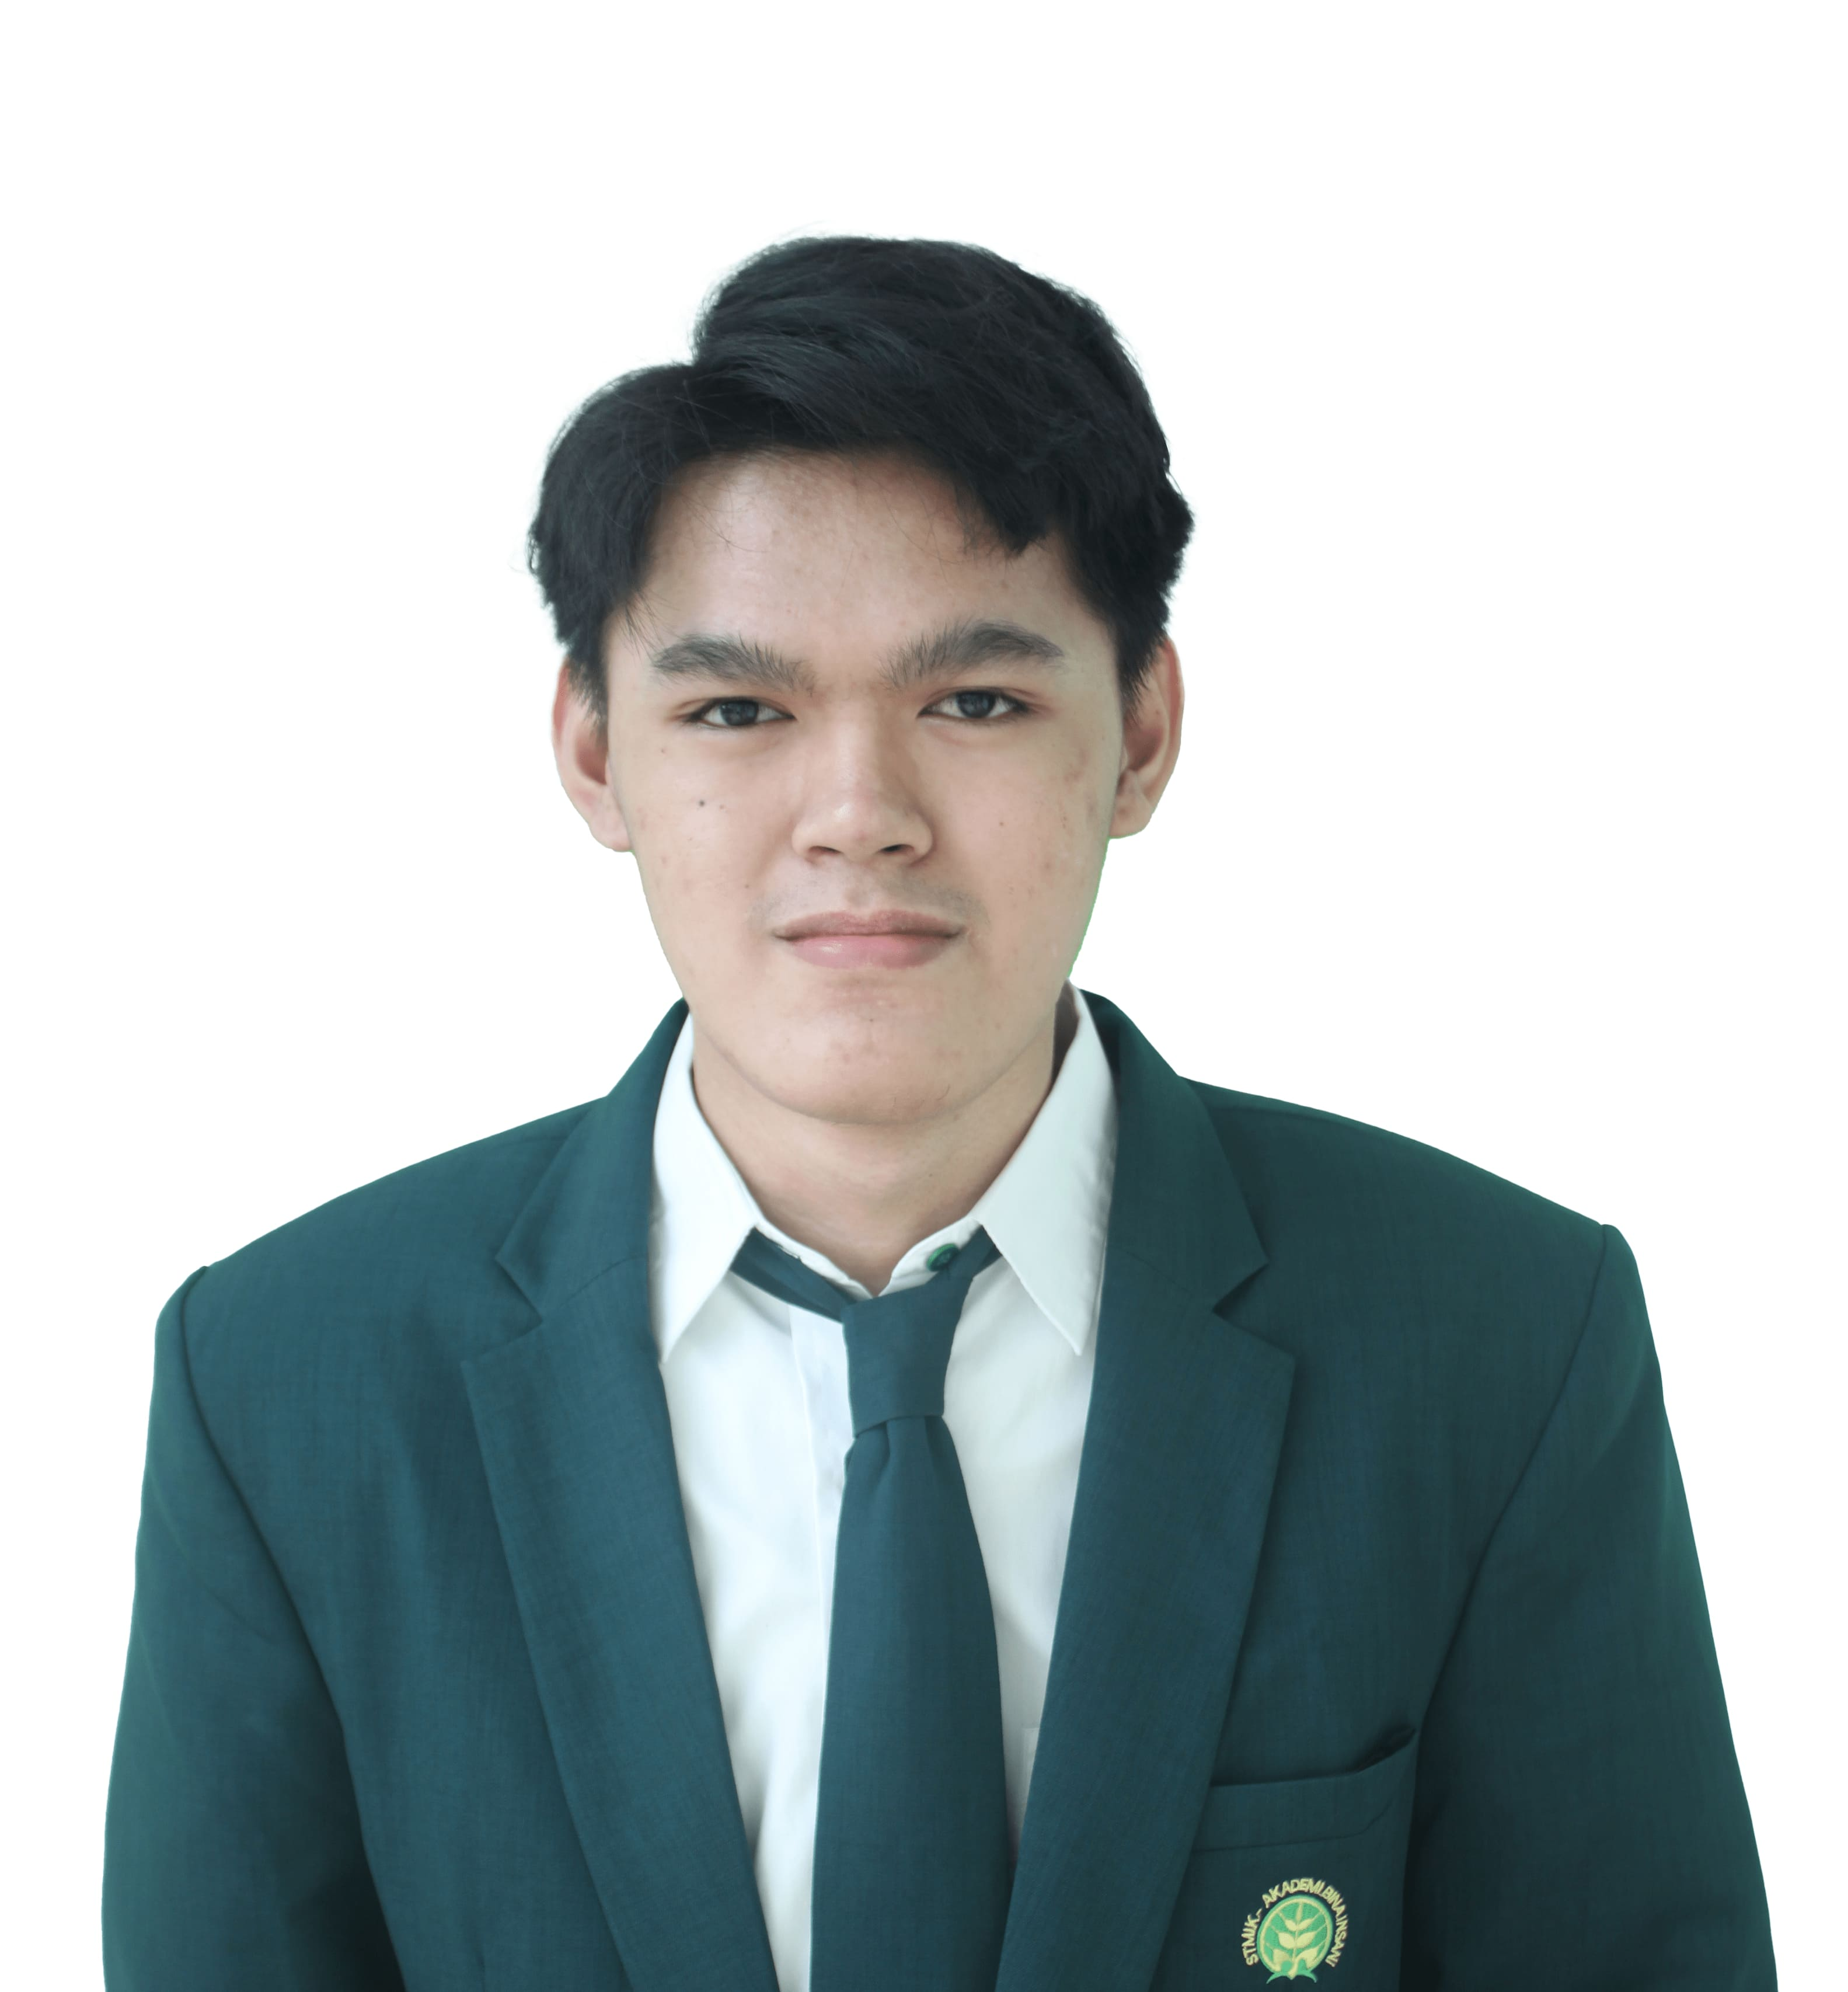

In [1]:
#@ Analisis Kinerja Penjualan (Sales Performance) Menggunakan Metode Time Series Analysis - Tema Hitam
import requests
from IPython.display import HTML
import base64

# ✅ Direct link ke gambar dari Google Drive
file_id = "1jo5M7fooGzTEqsJr6cTIlzOC6AMKPgki"
image_url = f"https://drive.google.com/uc?export=view&id={file_id}"

# ✅ Download gambar
response = requests.get(image_url)
with open("image.jpg", "wb") as file:
    file.write(response.content)

# ✅ Encode gambar ke base64
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# ✅ HTML template dengan tema hitam elegan
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header - Dark Mode</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #0f1115;
            color: #e0e0e0;
        }}
        .header {{
            display: flex;
            align-items: flex-start;
            padding: 25px;
            background-color: #1a1c22;
            border-bottom: 3px solid #00bfa6;
            box-shadow: 0 0 20px rgba(0, 191, 166, 0.2);
        }}
        .header img {{
            border-radius: 50%;
            width: 110px;
            height: 110px;
            object-fit: cover;
            margin-right: 25px;
            box-shadow: 0 0 25px rgba(0, 255, 204, 0.4);
        }}
        .text-container {{
            display: flex;
            flex-direction: column;
        }}
        h1 {{
            margin: 0;
            font-size: 2.4em;
            font-weight: 700;
            color: #00ffd0;
            text-transform: uppercase;
            letter-spacing: 1px;
            text-shadow: 0 0 15px rgba(0, 255, 204, 0.4);
            border-bottom: 3px solid;
            border-image: linear-gradient(to right, #00ffd0, #009688);
            border-image-slice: 1;
            display: inline-block;
            padding-bottom: 6px;
        }}
        p {{
            margin: 5px 0;
            font-size: 1em;
            color: #cfcfcf;
        }}
        strong {{
            color: #00ffd0;
        }}
        .social-icons {{
            margin-top: 12px;
        }}
        .social-icons a {{
            margin-right: 15px;
            color: #b0b0b0;
            text-decoration: none;
            font-size: 1.6em;
            transition: color 0.3s ease, transform 0.3s ease, text-shadow 0.3s ease;
        }}
        .social-icons a:hover {{
            color: #00ffd0;
            transform: scale(1.2);
            text-shadow: 0 0 10px #00ffd0;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">
            <h1>Analisis Produk Menggunakan Medode Pareto Analysis (80/20 Rule)</h1>
            <p>Data Analyst Project</p>
            <p>#soft_skills #sql #python #tableau #power_bi</p>
            <br>
            <p><strong>Bagas Aditya</strong></p>
            <div class="social-icons">
                <a href="https://wa.me/+6289622010731" target="_blank"><i class="fab fa-whatsapp"></i></a>
                <a href="https://www.linkedin.com/in/aditya-bagas/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="mailto:bagas331000@gmail.com" target="_blank"><i class="fas fa-envelope"></i></a>
            </div>
        </div>
    </header>
</body>
</html>
"""

display(HTML(html_code))

In [ ]:
#@title 1. Import Library Yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('ecommerce_sales_34500.csv')

In [4]:
print("Data Shape:", df.shape)

Data Shape: (34500, 17)


In [5]:
df.head(10)

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
5,O100005,C15191,P214062,Beauty,53.91,0.10,2,Credit Card,2024-04-14,5,South,No,97.04,6.32,37.35,35,Female
6,O100006,C13772,P201363,Electronics,266.50,0.00,1,PayPal,2025-05-20,5,East,No,266.50,9.10,22.88,49,Male
7,O100007,C13092,P216691,Beauty,9.98,0.00,1,Credit Card,2023-09-14,4,West,No,9.98,4.51,-0.02,66,Other
8,O100008,C15734,P202751,Fashion,6.61,0.05,1,Debit Card,2023-10-23,6,West,No,6.28,3.43,-1.23,37,Female
9,O100009,C16265,P207782,Grocery,10.91,0.00,1,Credit Card,2023-10-31,6,South,No,10.91,2.76,-1.89,56,Male


In [6]:
#@title Step 2. Data Overview
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64

In [7]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

In [8]:
df = df.dropna(subset=['product_id', 'category', 'quantity', 'total_amount', 'profit_margin'])

In [9]:
df['quantity'] = df['quantity'].astype(int)
df['total_amount'] = df['total_amount'].astype(float)
df['profit_margin'] = df['profit_margin'].astype(float)

In [10]:
print("Kategori unik:", df['category'].unique())
print("Jumlah produk unik:", df['product_id'].nunique())

Kategori unik: ['Home' 'Grocery' 'Electronics' 'Beauty' 'Fashion' 'Toys' 'Sports']
Jumlah produk unik: 24912


In [11]:
#Penjualan per kategori
sales_per_category = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
display(sales_per_category)

category
Electronics    3319206.50
Home           1077681.52
Sports          629825.54
Fashion         471545.80
Beauty          153019.38
Toys            132013.80
Grocery          82000.51
Name: total_amount, dtype: float64

In [12]:
#Rata-rata profit margin per kategori
avg_profit = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
display(avg_profit)

category
Electronics    55.723587
Home           47.864717
Sports         38.485114
Fashion        20.597162
Beauty         11.990395
Toys            7.927773
Grocery        -2.264160
Name: profit_margin, dtype: float64

In [13]:
top_products = df.groupby('product_id')['total_amount'].sum().sort_values(ascending=False).head(10)
display(top_products)

product_id
P217031    13035.01
P242326    11747.30
P224743    11298.30
P216077     8035.78
P225406     6786.53
P204291     6279.08
P208695     6227.16
P219612     6032.83
P247375     5662.93
P218610     5438.13
Name: total_amount, dtype: float64

In [14]:
#Produk dengan total penjualan tertinggi
top_products = df.groupby('product_id')['total_amount'].sum().sort_values(ascending=False).head(10)
display(top_products)

product_id
P217031    13035.01
P242326    11747.30
P224743    11298.30
P216077     8035.78
P225406     6786.53
P204291     6279.08
P208695     6227.16
P219612     6032.83
P247375     5662.93
P218610     5438.13
Name: total_amount, dtype: float64

In [15]:
# Hitung total penjualan per produk
product_sales = df.groupby('product_id')['total_amount'].sum().reset_index()

In [16]:
# Urutkan dari penjualan tertinggi ke terendah
product_sales = product_sales.sort_values(by='total_amount', ascending=False)

In [17]:
# Hitung persentase kontribusi dan kumulatif
product_sales['percentage'] = (product_sales['total_amount'] / product_sales['total_amount'].sum()) * 100
product_sales['cumulative_percentage'] = product_sales['percentage'].cumsum()

In [18]:
# Tandai produk yang masuk 80%
product_sales['pareto_class'] = np.where(product_sales['cumulative_percentage'] <= 80, 'Top 20%', 'Bottom 80%')

product_sales.head(15)

,product_id,total_amount,percentage,cumulative_percentage,pareto_class
8566,P217031,13035.01,0.222240,0.222240,Top 20%
21084,P242326,11747.30,0.200285,0.422525,Top 20%
12442,P224743,11298.30,0.192630,0.615154,Top 20%
8106,P216077,8035.78,0.137006,0.752160,Top 20%
12780,P225406,6786.53,0.115707,0.867867,Top 20%
2143,P204291,6279.08,0.107055,0.974921,Top 20%
4374,P208695,6227.16,0.106170,1.081091,Top 20%
9885,P219612,6032.83,0.102856,1.183947,Top 20%
23575,P247375,5662.93,0.096550,1.280497,Top 20%
9357,P218610,5438.13,0.092717,1.373214,Top 20%


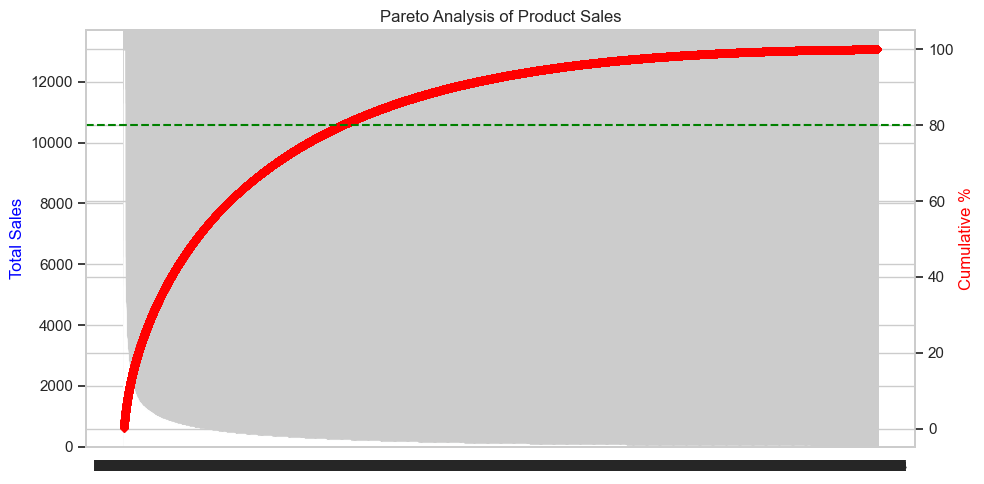

In [19]:
fig, ax1 = plt.subplots()

# Bar chart untuk total penjualan
ax1.bar(product_sales['product_id'], product_sales['total_amount'], color='skyblue')
ax1.set_ylabel('Total Sales', color='blue')

# Line chart untuk cumulative percentage
ax2 = ax1.twinx()
ax2.plot(product_sales['product_id'], product_sales['cumulative_percentage'], color='red', marker='D', ms=4)
ax2.axhline(80, color='green', linestyle='--')
ax2.set_ylabel('Cumulative %', color='red')

plt.title('Pareto Analysis of Product Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\bagas\AppData\Local\Temp\ipykernel_9292\270193496.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='profit_margin', data=rank_profit, palette='viridis')


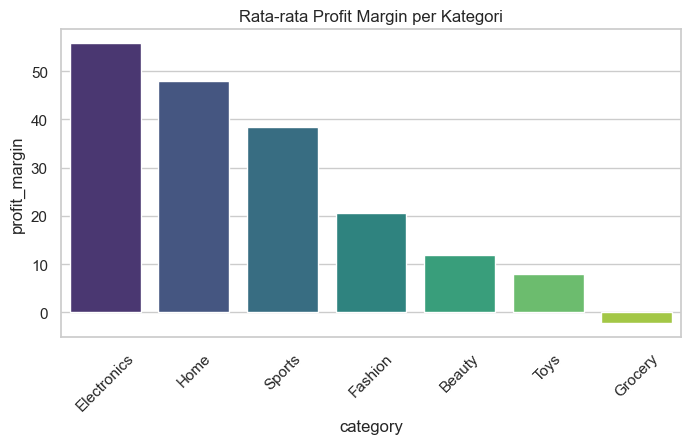

In [20]:
# Ranking kategori berdasarkan profit margin rata-rata
rank_profit = df.groupby('category')['profit_margin'].mean().reset_index().sort_values(by='profit_margin', ascending=False)
rank_profit

# Visualisasi
plt.figure(figsize=(8,4))
sns.barplot(x='category', y='profit_margin', data=rank_profit, palette='viridis')
plt.title('Rata-rata Profit Margin per Kategori')
plt.xticks(rotation=45)
plt.show()
